# 2. Project1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자

### (1) 데이터 가져오기

In [164]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes=load_diabetes()

df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


####  age     age in years
####     - sex
####       - bmi     body mass index
####       - bp      average blood pressure
####       - s1      tc, total serum cholesterol
####       - s2      ldl, low-density lipoproteins
####       - s3      hdl, high-density lipoproteins
####       - s4      tch, total cholesterol / HDL
####       - s5      ltg, possibly log of serum triglycerides level
####       - s6      glu, blood sugar level

In [165]:
df_y = pd.DataFrame(diabetes.target)

In [166]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_y1 = scaler.fit_transform(df_y)
# # X_test = scaler.transform(X_test)
# df_y1[0]
df_y[0]

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: 0, Length: 442, dtype: float64

In [167]:
np.corrcoef([df_X['bmi'], df_X['bp'], df_X['s1'], df_X['s2'] ,df_X['s2']], df_y[0])

array([[1.        , 0.39541532, 0.24977742, 0.26116991, 0.26116991,
        0.58645013],
       [0.39541532, 1.        , 0.24246971, 0.18555783, 0.18555783,
        0.44148385],
       [0.24977742, 0.24246971, 1.        , 0.89666296, 0.89666296,
        0.21202248],
       [0.26116991, 0.18555783, 0.89666296, 1.        , 1.        ,
        0.17405359],
       [0.26116991, 0.18555783, 0.89666296, 1.        , 1.        ,
        0.17405359],
       [0.58645013, 0.44148385, 0.21202248, 0.17405359, 0.17405359,
        1.        ]])

### (2) 모델에서 입력할 데이터 X 와 예측할 데이터 y 준비하기

In [168]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y[0])

#### df_y[0]으로 안하고 df_y로 하면 아래와 같이 하나의 행으로 되어 있지 않고 열로 형성되어 수정하였다.

In [169]:
# y = y.T[0]

In [170]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

### (3) train 데이터와 test 데이터로 분리하기

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [172]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### (4) 모델 준비하기

In [173]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [174]:
W

array([0.18016696, 0.5346427 , 0.43645059, 0.18640444, 0.3265075 ,
       0.35182582, 0.62432801, 0.88347883, 0.78451935, 0.48788257])

In [175]:
b

0.05342123086998518

In [176]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (5) 손실함수 loss  정의하기

In [177]:
def MSE(pred, real):
    mse = ((pred - real) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [178]:
def loss(x, W, b, y):
    predictions = model(x, W, b)
    L = MSE(predictions, y)
    return L

### (6) 기울기는 구하는 gradient 함수 구현하기

In [179]:
def gradient(X, W, b, y):
    
    N = len(W)
    
    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)
           
    db = 2 * (y_pred - y).mean()
    return dW, db

In [180]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.62237546  -13.7456815  -189.59899036 -142.6867437   -68.26360439
  -56.00476967  127.64180104 -138.98404876 -182.83062965 -123.51120561]
db: -304.16012586405185


### (7) 하이퍼 파라미터인 학습률 설정하기

In [181]:
LEARNING_RATE = 0.9

In [182]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f'%(i, L))    

Iteration 10 : Loss 3235.9552
Iteration 20 : Loss 2906.3053
Iteration 30 : Loss 2898.1533
Iteration 40 : Loss 2896.8147
Iteration 50 : Loss 2895.9833
Iteration 60 : Loss 2895.2446
Iteration 70 : Loss 2894.5381
Iteration 80 : Loss 2893.8530
Iteration 90 : Loss 2893.1867
Iteration 100 : Loss 2892.5384
Iteration 110 : Loss 2891.9074
Iteration 120 : Loss 2891.2933
Iteration 130 : Loss 2890.6954
Iteration 140 : Loss 2890.1134
Iteration 150 : Loss 2889.5468
Iteration 160 : Loss 2888.9952
Iteration 170 : Loss 2888.4581
Iteration 180 : Loss 2887.9352
Iteration 190 : Loss 2887.4261
Iteration 200 : Loss 2886.9303
Iteration 210 : Loss 2886.4477
Iteration 220 : Loss 2885.9777
Iteration 230 : Loss 2885.5201
Iteration 240 : Loss 2885.0745
Iteration 250 : Loss 2884.6406
Iteration 260 : Loss 2884.2181
Iteration 270 : Loss 2883.8067
Iteration 280 : Loss 2883.4061
Iteration 290 : Loss 2883.0161
Iteration 300 : Loss 2882.6362
Iteration 310 : Loss 2882.2664
Iteration 320 : Loss 2881.9063
Iteration 330 : L

Iteration 2760 : Loss 2868.5669
Iteration 2770 : Loss 2868.5663
Iteration 2780 : Loss 2868.5658
Iteration 2790 : Loss 2868.5653
Iteration 2800 : Loss 2868.5648
Iteration 2810 : Loss 2868.5643
Iteration 2820 : Loss 2868.5639
Iteration 2830 : Loss 2868.5634
Iteration 2840 : Loss 2868.5630
Iteration 2850 : Loss 2868.5626
Iteration 2860 : Loss 2868.5621
Iteration 2870 : Loss 2868.5617
Iteration 2880 : Loss 2868.5613
Iteration 2890 : Loss 2868.5609
Iteration 2900 : Loss 2868.5606
Iteration 2910 : Loss 2868.5602
Iteration 2920 : Loss 2868.5598
Iteration 2930 : Loss 2868.5595
Iteration 2940 : Loss 2868.5592
Iteration 2950 : Loss 2868.5588
Iteration 2960 : Loss 2868.5585
Iteration 2970 : Loss 2868.5582
Iteration 2980 : Loss 2868.5579
Iteration 2990 : Loss 2868.5576
Iteration 3000 : Loss 2868.5573
Iteration 3010 : Loss 2868.5570
Iteration 3020 : Loss 2868.5567
Iteration 3030 : Loss 2868.5565
Iteration 3040 : Loss 2868.5562
Iteration 3050 : Loss 2868.5560
Iteration 3060 : Loss 2868.5557
Iteratio

Iteration 6090 : Loss 2868.5466
Iteration 6100 : Loss 2868.5466
Iteration 6110 : Loss 2868.5466
Iteration 6120 : Loss 2868.5466
Iteration 6130 : Loss 2868.5466
Iteration 6140 : Loss 2868.5466
Iteration 6150 : Loss 2868.5466
Iteration 6160 : Loss 2868.5466
Iteration 6170 : Loss 2868.5466
Iteration 6180 : Loss 2868.5466
Iteration 6190 : Loss 2868.5466
Iteration 6200 : Loss 2868.5466
Iteration 6210 : Loss 2868.5466
Iteration 6220 : Loss 2868.5466
Iteration 6230 : Loss 2868.5466
Iteration 6240 : Loss 2868.5466
Iteration 6250 : Loss 2868.5466
Iteration 6260 : Loss 2868.5466
Iteration 6270 : Loss 2868.5466
Iteration 6280 : Loss 2868.5466
Iteration 6290 : Loss 2868.5466
Iteration 6300 : Loss 2868.5466
Iteration 6310 : Loss 2868.5466
Iteration 6320 : Loss 2868.5466
Iteration 6330 : Loss 2868.5466
Iteration 6340 : Loss 2868.5466
Iteration 6350 : Loss 2868.5466
Iteration 6360 : Loss 2868.5466
Iteration 6370 : Loss 2868.5466
Iteration 6380 : Loss 2868.5466
Iteration 6390 : Loss 2868.5466
Iteratio

Iteration 9070 : Loss 2868.5466
Iteration 9080 : Loss 2868.5466
Iteration 9090 : Loss 2868.5466
Iteration 9100 : Loss 2868.5466
Iteration 9110 : Loss 2868.5466
Iteration 9120 : Loss 2868.5466
Iteration 9130 : Loss 2868.5466
Iteration 9140 : Loss 2868.5466
Iteration 9150 : Loss 2868.5466
Iteration 9160 : Loss 2868.5466
Iteration 9170 : Loss 2868.5466
Iteration 9180 : Loss 2868.5466
Iteration 9190 : Loss 2868.5466
Iteration 9200 : Loss 2868.5466
Iteration 9210 : Loss 2868.5466
Iteration 9220 : Loss 2868.5466
Iteration 9230 : Loss 2868.5466
Iteration 9240 : Loss 2868.5466
Iteration 9250 : Loss 2868.5466
Iteration 9260 : Loss 2868.5466
Iteration 9270 : Loss 2868.5466
Iteration 9280 : Loss 2868.5466
Iteration 9290 : Loss 2868.5466
Iteration 9300 : Loss 2868.5466
Iteration 9310 : Loss 2868.5466
Iteration 9320 : Loss 2868.5466
Iteration 9330 : Loss 2868.5466
Iteration 9340 : Loss 2868.5466
Iteration 9350 : Loss 2868.5466
Iteration 9360 : Loss 2868.5466
Iteration 9370 : Loss 2868.5466
Iteratio

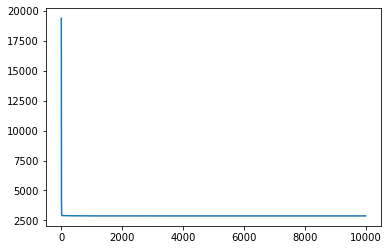

In [183]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

### pandas 데이터를 array로 바꾸어 사용하여 train 데이타와 test데이터로 분리할 수 있었습니다. LEARNING_RATE가 0.1 이상인 경우 loss 가 가장 작은 값을 갖는다. 
### 가중치 W 와 b의 값이 매우 중요할 변수로서 계산을 좀 더 정확하고 빠른 계산을 위해 실제 데이터와 유사한 값을 가지도록 하는 고민할 생각이다. 

### (9) 모델 학습하기

In [184]:
W, b

(array([  37.90032245, -241.96624533,  542.42578166,  347.7082964 ,
        -931.45980568,  518.04291375,  163.40288204,  275.30983782,
         736.18854064,   48.67113527]),
 151.345655273499)

In [185]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2900.1732303400768

### (10) 정답 데이터와 예측한 데이터 시각화하기

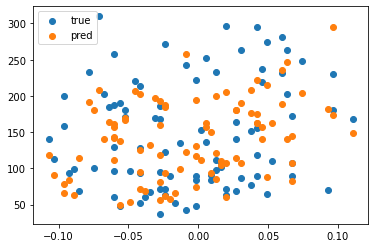

In [95]:
plt.scatter(X_test[:, 0], y_test, label ="true")
plt.scatter(X_test[:, 0], prediction, label = "pred")
plt.legend()
plt.show()

##### 정확히 예측하기 위해 데이터를 어떻게 가공할 지가 고민이 많이 되었다. 그리고 두 번째 고민은 여기서 선형 방정식을 만들어 모델을 만들고 그리고 나서 전처리 과정을 통해 예측 모델을 만들었다. 그러나 정확한 모델을 위해 이 공식과 데이터의 관계의 이해 매우 중요한 것 같다. 간단한 예제이지만 앞으로 고민을 많이 해야 할 부분을 만들어 주었다.

# 2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### (1) 데이터 가져오기

In [187]:
import pandas as pd
import numpy as np
import datetime

bicycle_man = pd.read_csv("train.csv")
bicycle_man

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### datetime - hourly date + timestamp
### season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
### holiday - whether the day is considered a holiday 
### workingday - whether the day is neither a weekend nor holiday
### weather 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scatteredclouds 
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
### temp - temperature in Celsius
### atemp - "feels like" temperature in Celsius
### humidity - relative humidity
### windspeed - wind speed
### casual - number of non-registered user rentals initiated
### registered - number of registered user rentals initiated
### count - number of total rentals

### (2) datetiem 컬럼을 datetiem 자료형으로 변환하고, 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [188]:
bicycle_man['datetime'] = pd.to_datetime(bicycle_man['datetime'])
bicycle_man

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [189]:
bicycle_man['Year'] = bicycle_man['datetime'].dt.year
bicycle_man['Month'] = bicycle_man['datetime'].dt.month
bicycle_man['Day'] = bicycle_man['datetime'].dt.day
bicycle_man['Hour'] = bicycle_man['datetime'].dt.hour
bicycle_man['Minute'] = bicycle_man['datetime'].dt.minute
bicycle_man['Second'] = bicycle_man['datetime'].dt.second

In [190]:
bicycle_man.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,Minute,Second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

Text(0.5, 0, 'Second')

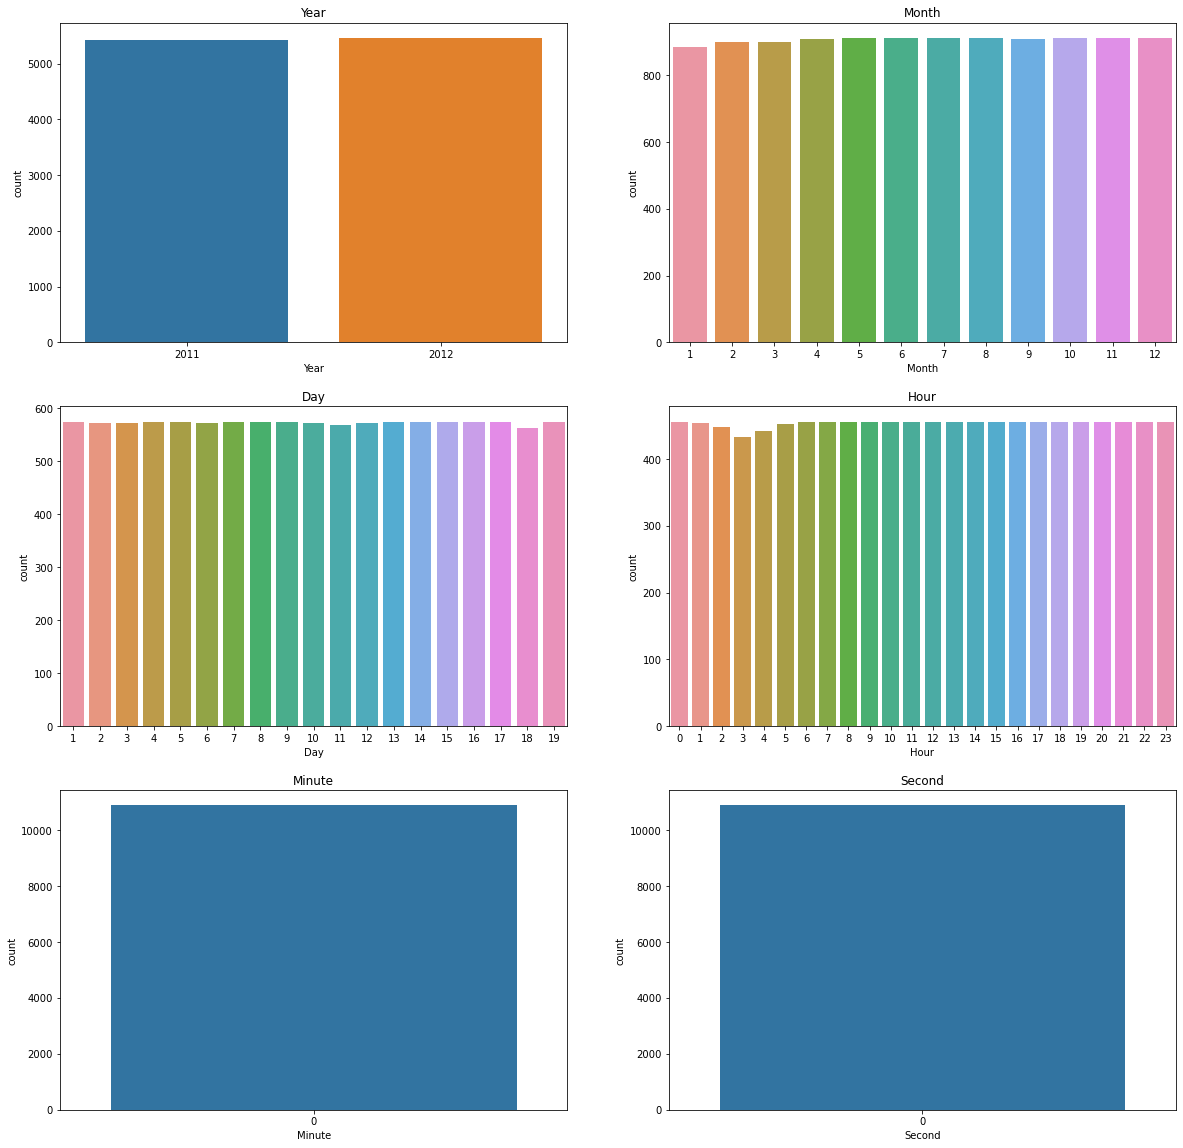

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.countplot(x ='Year', data = bicycle_man)
plt.title('Year')
plt.xlabel('Year')

plt.subplot(3, 2, 2)
sns.countplot(x ='Month', data = bicycle_man)
plt.title('Month')
plt.xlabel('Month')

plt.subplot(3, 2, 3)
sns.countplot(x ='Day', data = bicycle_man)
plt.title('Day')
plt.xlabel('Day')

plt.subplot(3, 2, 4)
sns.countplot(x ='Hour', data = bicycle_man)
plt.title('Hour')
plt.xlabel('Hour')

plt.subplot(3, 2, 5)
sns.countplot(x ='Minute', data = bicycle_man)
plt.title('Minute')
plt.xlabel('Minute')

plt.subplot(3, 2, 6)
sns.countplot(x ='Second', data = bicycle_man)
plt.title('Second')
plt.xlabel('Second')

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [192]:
df_X = bicycle_man.drop([ 'datetime', 'count', 'Minute', 'Second', 'casual', 'registered'], axis =1)
df_y = bicycle_man['count']
df_X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [193]:
df_y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [194]:
X = np.array(df_X)
y = np.array(df_y)

In [195]:
X.shape

(10886, 12)

In [196]:
y.shape

(10886,)

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708,)
(2178, 12) (2178,)


### (5) LinearRegression 모델 학습

In [198]:
X_train

array([[ 1.,  0.,  1., ...,  3., 16.,  0.],
       [ 3.,  0.,  1., ...,  8., 11., 23.],
       [ 2.,  0.,  1., ...,  6.,  2.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  2.,  5., 22.],
       [ 4.,  0.,  1., ..., 12., 13., 12.],
       [ 4.,  0.,  1., ..., 12., 12., 12.]])

In [199]:
y_train

array([ 57, 127,  42, ..., 191, 282, 145], dtype=int64)

In [200]:
X_test

array([[ 4.,  0.,  1., ..., 10.,  7., 20.],
       [ 2.,  0.,  1., ...,  4.,  4., 14.],
       [ 1.,  0.,  0., ...,  2., 18.,  7.],
       ...,
       [ 4.,  0.,  1., ..., 11., 13., 12.],
       [ 4.,  0.,  0., ..., 12.,  1.,  3.],
       [ 2.,  0.,  1., ...,  6.,  2.,  4.]])

In [201]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [202]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

linear_model = LinearRegression()

print(linear_model._estimator_type)

linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train, y_train))
print(linear_model.score(X_test, y_test))

regressor
0.3852366079937216
0.40373112479470175


In [205]:
y_pred

array([273.95051469, 280.66230208,  85.74253205, ..., 231.93707468,
       100.54094221, 178.09244204])

In [206]:
y_test

array([197, 123,  41, ..., 196,  15,   3], dtype=int64)

In [207]:
X_train

array([[0.        , 0.        , 1.        , ..., 0.18181818, 0.83333333,
        0.        ],
       [0.66666667, 0.        , 1.        , ..., 0.63636364, 0.55555556,
        1.        ],
       [0.33333333, 0.        , 1.        , ..., 0.45454545, 0.05555556,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.09090909, 0.22222222,
        0.95652174],
       [1.        , 0.        , 1.        , ..., 1.        , 0.66666667,
        0.52173913],
       [1.        , 0.        , 1.        , ..., 1.        , 0.61111111,
        0.52173913]])

In [208]:
y_train

array([ 57, 127,  42, ..., 191, 282, 145], dtype=int64)

In [209]:
linear_model.coef_

array([ -20.52810701,   -9.00714381,   -0.31854146,  -16.68290623,
         49.07109209,  219.43296964, -208.90023797,   27.8125607 ,
         81.33857009,  110.14135916,    7.72299581,  176.36182335])

In [210]:
linear_model.intercept_

1.2253688354334429

### 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [211]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

In [212]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#### Mean Squared Error

In [213]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [214]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean() 
    rmse = (mse)**0.5
    return rmse

In [215]:
def loss(x, W, b, y):
    predictions = model(x, W, b)
    L = RMSE(predictions, y)
    return L

In [216]:
def gradient(X, W, b, y):
    
    N = len(W)
    
    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)
           
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [217]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)
len(dW)

dW: [2.81320892e+06 3.29386242e+04 7.75686705e+05 1.64826905e+06
 2.22611384e+07 2.61074896e+07 7.27113883e+07 1.44222807e+07
 2.29588184e+09 7.29290436e+06 1.13820248e+07 1.23549635e+07]
db: 1258.2010580717756


12

In [218]:
LEARNING_RATE = 0.0001

In [219]:
losses = []

W = np.random.rand(12)
b = np.random.rand()
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f'%(i, L))

Iteration 10 : Loss 162.8450
Iteration 20 : Loss 157.8448
Iteration 30 : Loss 154.2006
Iteration 40 : Loss 151.4853
Iteration 50 : Loss 149.4273
Iteration 60 : Loss 147.8468
Iteration 70 : Loss 146.6201
Iteration 80 : Loss 145.6600
Iteration 90 : Loss 144.9030
Iteration 100 : Loss 144.3024
Iteration 110 : Loss 143.8230
Iteration 120 : Loss 143.4381
Iteration 130 : Loss 143.1274
Iteration 140 : Loss 142.8750
Iteration 150 : Loss 142.6689
Iteration 160 : Loss 142.4996
Iteration 170 : Loss 142.3597
Iteration 180 : Loss 142.2434
Iteration 190 : Loss 142.1461
Iteration 200 : Loss 142.0642
Iteration 210 : Loss 141.9950
Iteration 220 : Loss 141.9360
Iteration 230 : Loss 141.8855
Iteration 240 : Loss 141.8420
Iteration 250 : Loss 141.8044
Iteration 260 : Loss 141.7716
Iteration 270 : Loss 141.7429
Iteration 280 : Loss 141.7177
Iteration 290 : Loss 141.6955
Iteration 300 : Loss 141.6757
Iteration 310 : Loss 141.6581
Iteration 320 : Loss 141.6424
Iteration 330 : Loss 141.6282
Iteration 340 : Los

In [220]:
y_train

array([ 57, 127,  42, ..., 191, 282, 145], dtype=int64)

#### RMSE 값은 142 정도로 150이하로 나왔음

In [221]:
prediction = model(X_test, W, b)
rmse = loss(X_test, W, b, y_test)
rmse

142.3878571810622

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [228]:
y_pred_data = pd.DataFrame(y_pred)

Text(0.5, 0, 'Humidity')

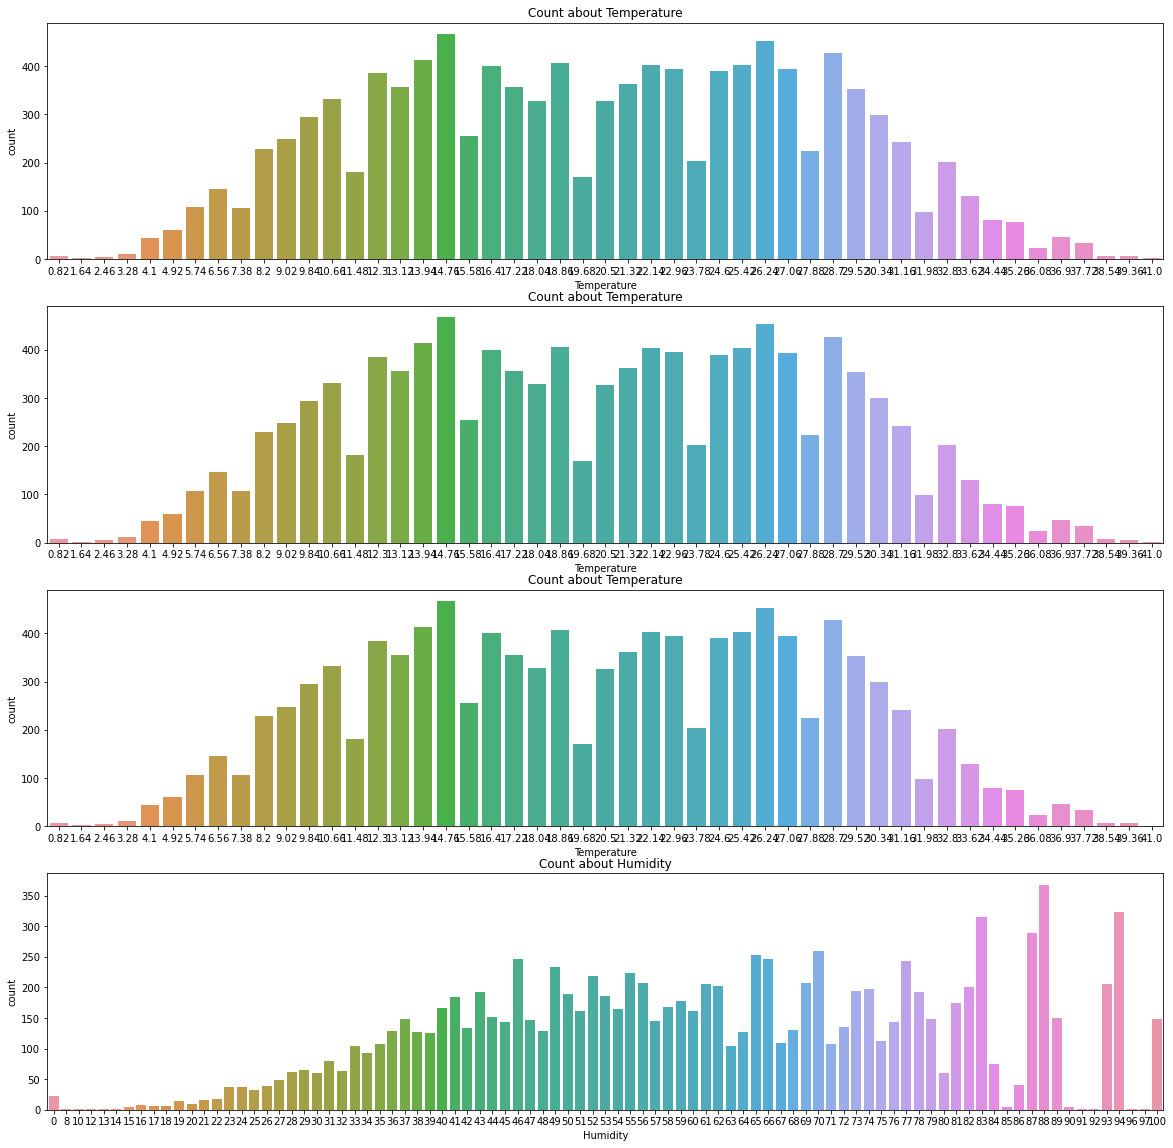

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plt.subplot(4, 1, 1)
sns.countplot( x = bicycle_man['temp'], data=bicycle_man['count']) # 원래의 데이터
plt.title('Count about Temperature')
plt.xlabel('Temperature')

plt.subplot(4, 1, 2)
sns.countplot( x = bicycle_man['temp'], data=y_pred_data) # 예측 데이터
plt.title('Count about Temperature')
plt.xlabel('Temperature')

plt.subplot(4, 1, 3)
sns.countplot( x = bicycle_man['temp'], data=bicycle_man['count']) # 원래의 데이터
plt.title('Count about Temperature')
plt.xlabel('Temperature')

plt.subplot(4, 1, 4)
sns.countplot(x=bicycle_man['humidity'], data=y_pred_data) # 예측 데이터
plt.title('Count about Humidity')
plt.xlabel('Humidity')

### LinearRegression을 하였더니 1이 나왔다. 아무리 찾아도 알 수 없는데 해창님이 알려주셨는 데 이 데이터 중 casual과 registered 데이터가 합하면 우리가 얻고자는 count 데이터와 같은 값을 가지기 때문에 이런 문제가 생겼다. 이것을 보고 데이터를 자세히 보는 것이 매우 중요하고 데이터 간의 상관관계를 잘 이해하여만 하는 것을 배울 수 있었다.
### 데이터를 분석을 하기 위해서는 무엇보다 데이터의 이해가 매우 중요하는 것을 알 수 있었다. 데이터가 충분한 이해가 되야 어떠한 모델을 설정과 그 모델에 맞은 데이터 가공이 가능하다고 생각 된다. 
